In [1]:
import pandas as pd
import scipy as sp
import numpy as np

from abtools.bayesian import LognormalARPUABModel

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
data = pd.read_csv('data.csv')

In [3]:
a_conversion = (data.query('abgroup == "control"')['revenue'] > 0) * 1
a_revenue = data.query('revenue > 0 and abgroup == "control"')['revenue']
b_conversion = (data.query('abgroup == "test"')['revenue'] > 0) * 1
b_revenue = data.query('revenue > 0 and abgroup == "test"')['revenue']

In [4]:
model = LognormalARPUABModel(
    {'revenue': a_revenue, 'conversion': a_conversion},
    {'revenue': b_revenue, 'conversion': b_conversion}
)

/home/ivba/.local/lib/python3.5/site-packages/theano/tensor/basic.py:2146: UserWarning: theano.tensor.round() changed its default from `half_away_from_zero` to `half_to_even` to have the same default as NumPy. Use the Theano flag `warn.round=False` to disable this warning.
  "theano.tensor.round() changed its default from"
/home/ivba/.local/lib/python3.5/site-packages/theano/tensor/basic.py:2146: UserWarning: theano.tensor.round() changed its default from `half_away_from_zero` to `half_to_even` to have the same default as NumPy. Use the Theano flag `warn.round=False` to disable this warning.
  "theano.tensor.round() changed its default from"


In [5]:
model.fit()

         Current function value: 816440.047229
         Iterations: 20
         Function evaluations: 115
         Gradient evaluations: 103


100%|██████████| 10000/10000 [02:36<00:00, 63.74it/s]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7faad49bd358>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7faacb2b0518>], dtype=object)

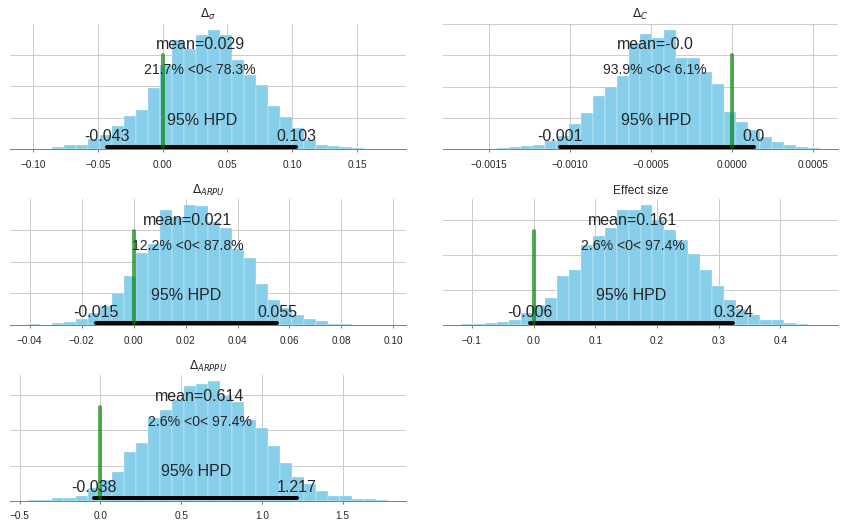

In [6]:
model.plot_deltas()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7faac799a908>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7faac5cf55f8>], dtype=object)

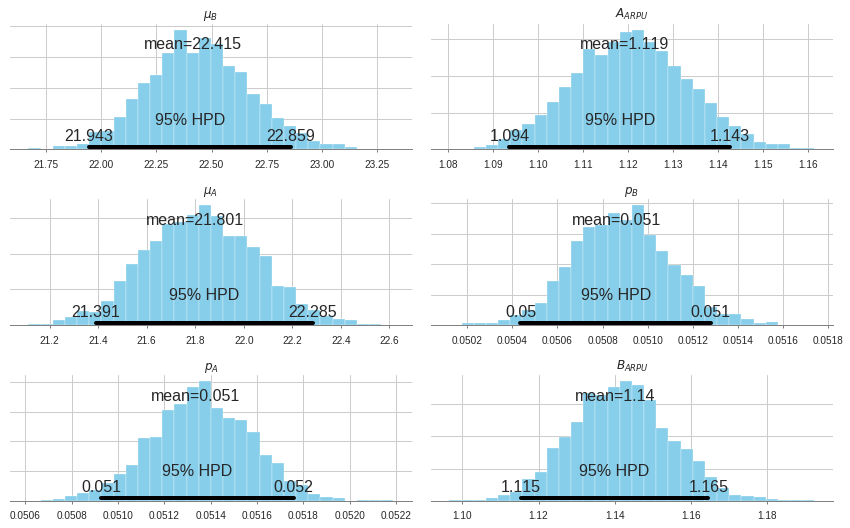

In [7]:
model.plot_params()

In [8]:
model.summary()

,mean,sd,mc_error,hpd_2.5,hpd_97.5
$\mu_{ln(A)}$,1.833877,0.006912,0.000174,1.820242,1.846943
$\mu_{ln(B)}$,1.841468,0.006920,0.000208,1.828075,1.855190
$\tau_A$,0.400651,0.002493,0.000066,0.395912,0.405452
$\tau_B$,0.394274,0.002453,0.000060,0.389788,0.399169
$\mu_A$,21.800877,0.229360,0.006396,21.390709,22.284588
$\mu_B$,22.414893,0.233942,0.006030,21.942631,22.859002
$A_{\sigma^2}$,14.408942,0.199346,0.005033,14.019998,14.789038
$B_{\sigma^2}$,14.629373,0.202509,0.006084,14.241353,15.034999
$p_A$,0.051336,0.000215,0.000006,0.050927,0.051758
$p_B$,0.050862,0.000217,0.000005,0.050436,0.051281
